**학번 : 2017250039**

**이름 : 임형택**

In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

일단 라이브러리들을 불러오고, 'train.csv', 'test.csv' 파일 또한 불러오자.

그 후 제대로 파일을 불러왔는지 train.head()로 확인해보았다.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


위의 데이터 프레임을 살펴보면 승객 데이터에서 제공되는 특성은 10가지가 있는데,

* **Survived**: 타깃입니다. 0은 생존하지 못한 것이고 1은 생존을 의미합니다.
* **Pclass**: 승객 등급. 1, 2, 3등석.
* **Name**, **Sex**, **Age**: 이름 그대로 의미입니다.
* **SibSp**: 함께 탑승한 형제, 배우자의 수.
* **Parch**: 함께 탑승한 자녀, 부모의 수.
* **Ticket**: 티켓 아이디
* **Fare**: 티켓 요금 (파운드)
* **Cabin**: 객실 번호
* **Embarked**: 승객이 탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)

그 중에서 의미를 바로 알기 힘든 것들을 자세하게 살펴보자.

*  **Survivied** - 생존 여부(0은 사망, 1은 생존; train 데이터에서만 제공)
*  **Pclass** - 사회경제적 지위(1에 가까울 수록 높음)
*  **SipSp** - 배우자나 형제 자매 명 수의 총 합
*  **Parch** - 부모 자식 명 수의 총 합

그리고 Survived 특성을 참고하여 차트를 확인하면

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


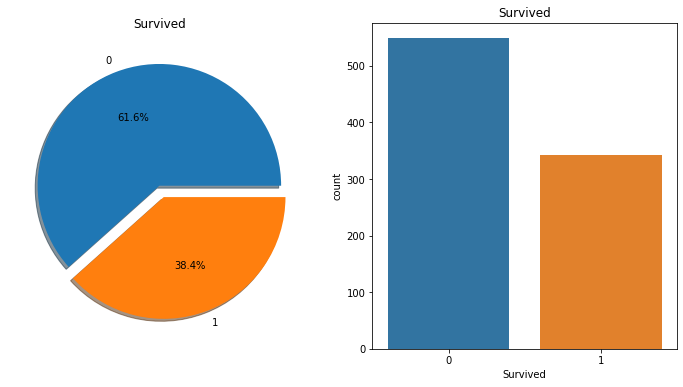

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax=plt.subplots(1, 2, figsize=(12,6))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

위에 설명한 것처럼 0은 사망, 1은 생존을 의미하니까 탑승객의 60% 이상이 사망했다는 결론을 얻을 수 있다.

우선 타이타닉호 사건에 대해서 찾아봤는데 등급(Pclass)이 높을수록

**그리고 여성과 아이를 먼저 구조했거 때문에 Survived는 당연히 타깃으로 잡고, (Pclass, Sex, Age)를 특성 기준으로 삼으면 좋을 것 같다.**

한번 성별과 나이, Pclass까지 참고하여 차트를 확인해 보자.

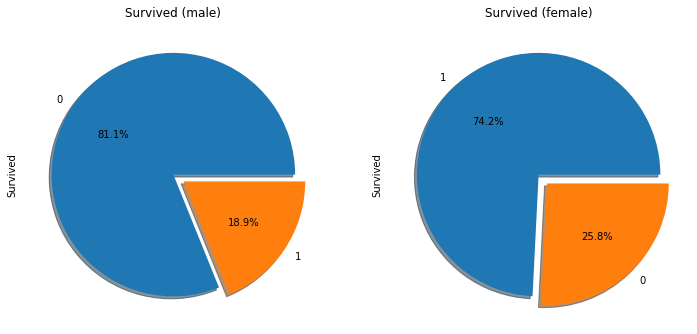

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,6))
train['Survived'][train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
train['Survived'][train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
plt.show()

위에서 말했듯 여성과 아이를 먼저 구하는 문화가 있었기 때문에 여성이 생존율이 높은것을 확인 할 수 있다.

밑에있는 차트는 Pclass와 (Sex, Survived)특성을 비교한다.

In [ ]:
pd.crosstab([train['Sex'],train['Survived']],[train['Pclass']],margins=True).style.background_gradient(cmap='summer_r')

보다시피 높은 등급일수록 생존 확률이 높았다는 것을 확인할 수 있다.

특히 3등급 객실에 있었던 남성의 경우 생존률이 엄청 낮은 것을 확인할 수 있다.

**누락 데이터 확인**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age가 null값이 있는 것을 확인할 수 있다.

아까 특성을 정할 때 중요하게 생각한다고 한 만큼 지우는것보다 중간 나이로 넣는 방식으로 해보자.

In [ ]:
train['Age'][train.isnull().any(axis=1)]

0      22.0
2      26.0
4      35.0
5       NaN
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888     NaN
890    32.0
Name: Age, Length: 708, dtype: float64

In [ ]:
median = train["Age"].median()
train["Age"].fillna(median, inplace=True)

중간 값을 넣고 다시 수치를 확인하면

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


"Age" 특성에 null이 사라져서 누락된 값이 채워진 것을 볼 수 있다.

또한 "Sex" 특성에 있는 "male", "female"을 수치형으로 바꾼다.

In [ ]:
i = 0
while i < len(train["Sex"]):
  if train["Sex"][i] == "male" :
    train["Sex"][i] = 0
  else :
    train["Sex"][i] = 1
  i += 1
train["Sex"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: object

마찬가지로 "Age" 특성에 아이(12살 이하)와 어른을 구별하기 위해 두개의 범위를 만든다.

In [ ]:
i = 0
while i < len(train["Age"]):
  if train["Age"][i] < 13.0 :
    train["Age"][i] = 0.0
  else :
    train["Age"][i] = 1.0
  i += 1
train["Age"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
886    1.0
887    1.0
888    1.0
889    1.0
890    1.0
Name: Age, Length: 891, dtype: float64

여기서 한번 예측 모델을 실행하고 결과를 도출해보자.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure

train_df, test_df = train_test_split(train, test_size=0.3,random_state=0)
target_col = ['Pclass', 'Sex', 'Age']
train_X=train_df[target_col]
train_Y=train_df['Survived']
test_X=test_df[target_col]
test_Y=test_df['Survived']

features_one = train_X.values
target = train_Y.values

tree_model = DecisionTreeClassifier()
tree_model.fit(features_one, target)
dt_prediction = tree_model.predict(test_X)

print(metrics.accuracy_score(dt_prediction, test_Y))

0.7947761194029851


예측 모델은 0.7947761194029851이라는 결과가 나온다.

test 값에도 적용하기 위해 test.csv의 "Sex", "Age" 특성에도 똑같이 처리를 해주고 다시 실행하고 파일을 만들어서 제출을 해보자.

In [ ]:
i = 0
while i < len(test["Sex"]):
  if test["Sex"][i] == "male" :
    test["Sex"][i] = 0
  else :
    test["Sex"][i] = 1
  i += 1
test["Sex"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: object

In [ ]:
i = 0
while i < len(test["Age"]):
  if test["Age"][i] < 13.0 :
    test["Age"][i] = 0.0
  else :
    test["Age"][i] = 1.0
  i += 1
test["Age"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
413    1.0
414    1.0
415    1.0
416    1.0
417    1.0
Name: Age, Length: 418, dtype: float64

밑은 결과 제출을 위해 예측모델 파일을 생성하는 코드이다.

In [ ]:
# predict test data with pre-trained tree model
test_features = test[target_col].values
dt_prediction_result = tree_model.predict(test_features)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId = np.array(test["PassengerId"]).astype(int)
dt_solution = pd.DataFrame(dt_prediction_result, PassengerId, columns = ["Survived"])

# Write your solution to a csv file with the name my_solution.csv
dt_solution.to_csv("my_solution_one.csv", index_label = ["PassengerId"]) 